In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.cloud import bigquery
client = bigquery.Client()

my_query = """
SELECT * FROM `dsc-team-e-pr-428ee1.ooklaspeedtest.ooklaspeedtest_table`
"""

df=pd.read_csv("West_Ookla_Speedtests_Jan_Feb_v03.csv")
df = df[['y_log', 'low_dbm', 'high_dbm','CELL_BANDWIDTHS_A_log', 'DBM_A_log', 'Band_type', 'CellName', 'OOKLA_DEVICE_NAME']]

df2=pd.read_csv("speedtest_device_category.csv")
df=pd.merge(df,df2, on='OOKLA_DEVICE_NAME', how='left')
df


/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (118,173,203,241) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,y_log,low_dbm,high_dbm,CELL_BANDWIDTHS_A_log,DBM_A_log,Band_type,CellName,OOKLA_DEVICE_NAME,DL_Category,UL_Category
0,1.9020,0.0,0.450,0.59,0.450,High,LTSBC0226242-001-2100-1-2,Pixel 7 Pro,NaN,NaN
1,2.2552,0.0,0.580,0.53,0.580,High,LTHBC0110129-041-1900-1-2,Pixel 7,NaN,NaN
2,1.0890,0.0,-0.200,0.88,-0.200,High,LTSAB0213190-110-2600-1-1,Galaxy S22 Ultra,19.0,16.0
3,0.8170,0.0,0.290,0.83,0.290,High,LTHAB0113913-042-1900-1-3,Galaxy S20 Fan Edition 5G,15.0,6.0
4,2.2760,0.0,0.830,0.59,0.830,High,LTSBC0210556-040-1900-1-1,Galaxy S23 Ultra,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2750,1.9350,0.0,0.700,0.47,0.700,High,LTSBC0210604-042-1900-1-3,Pixel 6 Pro 5G,18.0,5.0
2751,2.1490,0.0,0.079,0.53,0.079,High,LTHBC0110221-040-1900-1-1,Pixel 6 Pro 5G,18.0,5.0
2752,2.1180,0.0,0.670,0.83,0.670,High,LTHAB0114412-042-1900-1-3,Galaxy Note20 Ultra 5G,19.0,13.0
2753,1.0630,0.4,0.000,0.59,0.400,Low,LTHAB0113099-022-0700-2-3,Galaxy S20 Fan Edition 5G,15.0,6.0


In [35]:


df = df[['y_log', 'low_dbm', 'high_dbm','CELL_BANDWIDTHS_A_log', 'DBM_A_log', 'Band_type', 'CellName', 'DL_Category']]
df

,y_log,low_dbm,high_dbm,CELL_BANDWIDTHS_A_log,DBM_A_log,Band_type,CellName,DL_Category
0,1.9020,0.0,0.450,0.59,0.450,High,LTSBC0226242-001-2100-1-2,NaN
1,2.2552,0.0,0.580,0.53,0.580,High,LTHBC0110129-041-1900-1-2,NaN
2,1.0890,0.0,-0.200,0.88,-0.200,High,LTSAB0213190-110-2600-1-1,19.0
3,0.8170,0.0,0.290,0.83,0.290,High,LTHAB0113913-042-1900-1-3,15.0
4,2.2760,0.0,0.830,0.59,0.830,High,LTSBC0210556-040-1900-1-1,NaN
...,...,...,...,...,...,...,...,...
2750,1.9350,0.0,0.700,0.47,0.700,High,LTSBC0210604-042-1900-1-3,18.0
2751,2.1490,0.0,0.079,0.53,0.079,High,LTHBC0110221-040-1900-1-1,18.0
2752,2.1180,0.0,0.670,0.83,0.670,High,LTHAB0114412-042-1900-1-3,19.0
2753,1.0630,0.4,0.000,0.59,0.400,Low,LTHAB0113099-022-0700-2-3,15.0


In [36]:
df['DL_Category'].value_counts()

19.0    1131
16.0     290
18.0     247
15.0     231
11.0      60
4.0       42
9.0       35
6.0       29
3.0        4
12.0       3
20.0       1
Name: DL_Category, dtype: int64

In [37]:
df = df[df['DL_Category'] == 19]
df

,y_log,low_dbm,high_dbm,CELL_BANDWIDTHS_A_log,DBM_A_log,Band_type,CellName,DL_Category
2,1.0890,0.00,-0.20,0.88,-0.20,High,LTSAB0213190-110-2600-1-1,19.0
6,2.2959,0.00,0.29,0.88,0.29,High,LTSAB0213151-042-1900-1-3,19.0
7,2.2612,0.00,0.19,0.88,0.19,High,LTSAB0213151-042-1900-1-3,19.0
15,2.2829,0.00,0.33,0.83,0.33,High,LTHBC0110239-131-2600-3-2,19.0
17,0.7530,0.19,0.00,0.76,0.19,Low,LTHAB0113587-070-0850-1-1,19.0
...,...,...,...,...,...,...,...,...
2733,1.1480,0.00,0.91,0.30,0.91,High,LTHAB0113837-040-1900-1-1,19.0
2734,1.1750,0.00,0.91,0.30,0.91,High,LTHAB0113837-040-1900-1-1,19.0
2747,2.3837,0.00,0.36,0.83,0.36,High,LTHAB0123280-110-2600-1-1,19.0
2749,2.2824,0.00,0.89,0.86,0.89,High,LTHAB0113966-112-2600-1-3,19.0


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

from sklearn import linear_model
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [39]:
# 3. Split in training and testing set
#---from above 'y_log', 'low_dbm', 'high_dbm','CELL_BANDWIDTHS_A_log', 'DBM_A_log', 'Band_type', 'CellName', 'DL_Category']]

#X = df[['CELL_BANDWIDTHS_A_log','DBM_A_log','low_dbm','high_dbm']]
#Y = df['y_log']
#x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)


X_df = df[['CELL_BANDWIDTHS_A_log', 'low_dbm','high_dbm']]
Y_df = df[['y_log']]

# X_df = df_merged.drop(['DBM_A_log','CellName','Band_type','y_log','DL_Category'],axis=1)
#X_df = df.drop(['DBM_A_log','CellName','Band_type','y_log','DL_Category'],axis=1)

# Split the dataset into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_df, Y_df, test_size=0.3)

In [40]:
X_train.head(10)

,CELL_BANDWIDTHS_A_log,low_dbm,high_dbm
1266,0.910,0.00,0.33
2381,0.880,0.00,-0.20
966,0.880,0.00,0.81
1720,0.018,0.43,0.00
1998,0.180,0.00,0.97
331,0.470,0.00,0.33
1567,0.830,0.00,0.85
1714,0.590,0.00,0.19
2100,0.760,0.00,0.14
2045,0.470,0.00,0.90


In [41]:
X_train.shape[0]

791

In [42]:
X_test.shape[0]

340

In [43]:
y_train.shape[0]

791

In [44]:
# A.1 Compute Linear Regression Model without cell information   (Eq.2)
# ============================================================

linear_regression_model = linear_model.LinearRegression()
linear_regression_model.fit(X_train, y_train)

y_pred = linear_regression_model.predict(X_test)
linear_regression_model.score(X_test, y_test)

# Calculate Mean Squared Error and RMS

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

# Mean Abs Error
print("Mean abolute error: %.2f" % mean_absolute_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# List out the coefficients and the intercept of the linear regresion function
print('The coefficients of the linear regression function are:\n',linear_regression_model.coef_)
print('The intercept of the linear regression function is:\n',linear_regression_model.intercept_)

Mean squared error: 0.19
Mean abolute error: 0.34
Coefficient of determination: 0.36
The coefficients of the linear regression function are:
 [[ 0.46361177 -0.01926121  0.60099577]]
The intercept of the linear regression function is:
 [1.29174914]


Text(0, 0.5, 'Predicted Y')

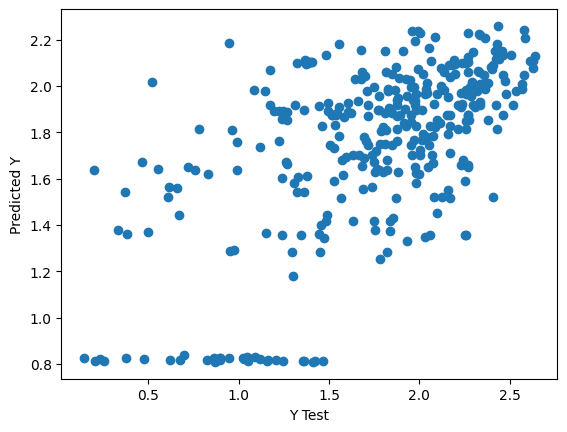

In [45]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [46]:
# try including DBM_A_log
# 3. Split in training and testing set
#---from above 'y_log', 'low_dbm', 'high_dbm','CELL_BANDWIDTHS_A_log', 'DBM_A_log', 'Band_type', 'CellName', 'DL_Category']]

#X = df[['CELL_BANDWIDTHS_A_log','DBM_A_log','low_dbm','high_dbm']]
#Y = df['y_log']
#x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)


X_df = df[['CELL_BANDWIDTHS_A_log', 'low_dbm','high_dbm', 'DBM_A_log']]
Y_df = df[['y_log']]

# X_df = df_merged.drop(['DBM_A_log','CellName','Band_type','y_log','DL_Category'],axis=1)
#X_df = df.drop(['DBM_A_log','CellName','Band_type','y_log','DL_Category'],axis=1)

# Split the dataset into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_df, Y_df, test_size=0.3)

# A.1 Compute Linear Regression Model without cell information   (Eq.2)
# ============================================================

linear_regression_model = linear_model.LinearRegression()
linear_regression_model.fit(X_train, y_train)

y_pred = linear_regression_model.predict(X_test)
linear_regression_model.score(X_test, y_test)

# Calculate Mean Squared Error and RMS

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

# Mean Abs Error
print("Mean abolute error: %.2f" % mean_absolute_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# List out the coefficients and the intercept of the linear regresion function
print('The coefficients of the linear regression function are:\n',linear_regression_model.coef_)
print('The intercept of the linear regression function is:\n',linear_regression_model.intercept_)

Mean squared error: 0.18
Mean abolute error: 0.33
Coefficient of determination: 0.43
The coefficients of the linear regression function are:
 [[ 0.46903466 -0.1375867   0.36356267  0.22597597]]
The intercept of the linear regression function is:
 [1.2827107]


Text(0, 0.5, 'Predicted Y')

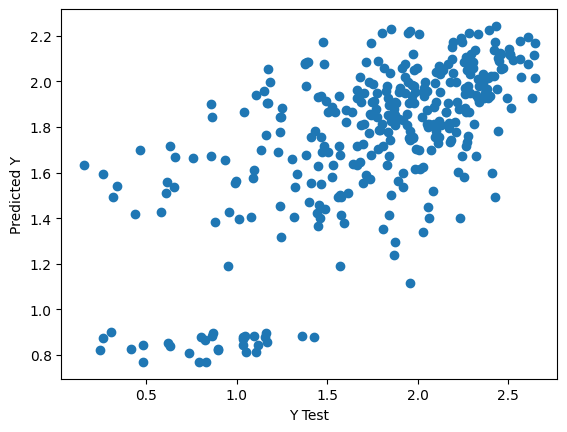

In [47]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [48]:
#our interpreation of the model coefficients - coefficients aren't showing a strong relationship. 
#high dbm is moderately correlated at .6 
#None of the parameters are highly correclated
#since we saw little correlation we tried we tried also adding in DBM_A_log but the results weren't any better 
#we likely need a non-linear model as the linear regression shows poor results 